In [92]:
import pandas as pd

In [93]:
titanic_df = pd.read_csv('titanic.csv')

In [94]:
titanic_df.head()

,id,gender,age,class,embarked,country,fare,sibsp,parch,survived
0,0,male,42.0,3rd,Southampton,United States,7.11,0.0,0.0,no
1,1,male,13.0,3rd,Southampton,United States,20.05,0.0,2.0,no
2,2,male,16.0,3rd,Southampton,United States,20.05,1.0,1.0,no
3,3,female,39.0,3rd,Southampton,England,20.05,1.0,1.0,yes
4,4,female,16.0,3rd,Southampton,Norway,7.13,0.0,0.0,yes


In [120]:
titanic_df.isnull().count()

gender      2207
age         2207
class       2207
embarked    2207
country     2207
fare        2207
sibsp       2207
parch       2207
survived    2207
crew        2207
dtype: int64

In [106]:
titanic_df.drop('id', axis=1, inplace=True)

In [95]:
pd.value_counts(titanic_df['class'])

3rd                 709
victualling crew    431
1st                 324
engineering crew    324
2nd                 284
restaurant staff     69
deck crew            66
Name: class, dtype: int64

In [96]:
def create_crew(row):

    if 'staff' in row['class'] or 'crew' in row['class']:
        return 1
    else:
        return 0

In [97]:
titanic_df['crew'] = titanic_df.apply(lambda row: create_crew(row), axis=1)

In [98]:
titanic_df.tail(100)

,id,gender,age,class,embarked,country,fare,sibsp,parch,survived,crew
2107,2107,male,17.0,victualling crew,Southampton,England,0.0,0.0,0.0,no,1
2108,2108,male,46.0,victualling crew,Southampton,England,0.0,0.0,0.0,yes,1
2109,2109,male,23.0,victualling crew,Southampton,England,0.0,0.0,0.0,yes,1
2110,2110,male,30.0,victualling crew,Belfast,England,0.0,0.0,0.0,yes,1
2111,2111,male,24.0,engineering crew,Southampton,England,0.0,0.0,0.0,no,1
...,...,...,...,...,...,...,...,...,...,...,...
2202,2202,male,41.0,deck crew,Belfast,England,0.0,0.0,0.0,yes,1
2203,2203,male,40.0,victualling crew,Southampton,England,0.0,0.0,0.0,yes,1
2204,2204,male,32.0,engineering crew,Southampton,England,0.0,0.0,0.0,no,1
2205,2205,male,20.0,restaurant staff,Southampton,England,0.0,0.0,0.0,no,1


In [99]:
titanic_df.loc[titanic_df['crew'] == 1]

,id,gender,age,class,embarked,country,fare,sibsp,parch,survived,crew
476,476,male,20.0,engineering crew,Southampton,England,0.0,0.0,0.0,no,1
653,653,male,44.0,engineering crew,Southampton,England,0.0,0.0,0.0,no,1
1319,1319,male,21.0,victualling crew,Southampton,England,0.0,0.0,0.0,no,1
1320,1320,male,34.0,engineering crew,Southampton,England,0.0,0.0,0.0,no,1
1321,1321,male,26.0,engineering crew,Southampton,England,0.0,0.0,0.0,no,1
...,...,...,...,...,...,...,...,...,...,...,...
2202,2202,male,41.0,deck crew,Belfast,England,0.0,0.0,0.0,yes,1
2203,2203,male,40.0,victualling crew,Southampton,England,0.0,0.0,0.0,yes,1
2204,2204,male,32.0,engineering crew,Southampton,England,0.0,0.0,0.0,no,1
2205,2205,male,20.0,restaurant staff,Southampton,England,0.0,0.0,0.0,no,1


In [100]:
pd.value_counts(titanic_df['crew'])

0    1317
1     890
Name: crew, dtype: int64

In [101]:
titanic_df['survived'] = titanic_df.apply(lambda row: 0 if row['survived'] == 'no' else 1, axis=1)

In [102]:
titanic_df.head()

,id,gender,age,class,embarked,country,fare,sibsp,parch,survived,crew
0,0,male,42.0,3rd,Southampton,United States,7.11,0.0,0.0,0,0
1,1,male,13.0,3rd,Southampton,United States,20.05,0.0,2.0,0,0
2,2,male,16.0,3rd,Southampton,United States,20.05,1.0,1.0,0,0
3,3,female,39.0,3rd,Southampton,England,20.05,1.0,1.0,1,0
4,4,female,16.0,3rd,Southampton,Norway,7.13,0.0,0.0,1,0


In [103]:
titanic_df.groupby(['class', 'gender', 'crew'])['survived'].mean()

class             gender  crew
1st               female  0       0.965278
                  male    0       0.344444
2nd               female  0       0.886792
                  male    0       0.134831
3rd               female  0       0.490741
                  male    0       0.152130
deck crew         male    1       0.651515
engineering crew  male    1       0.219136
restaurant staff  female  1       1.000000
                  male    1       0.014925
victualling crew  female  1       0.857143
                  male    1       0.185366
Name: survived, dtype: float64

In [104]:
titanic_df.groupby(['gender', 'crew'])['survived'].mean()

gender  crew
female  0       0.727468
        1       0.869565
male    0       0.189189
        1       0.220300
Name: survived, dtype: float64

In [105]:
titanic_df[titanic_df['age'] < 18].groupby(['gender', 'class'])['survived'].mean()

gender  class           
female  1st                 0.833333
        2nd                 1.000000
        3rd                 0.482759
male    1st                 0.857143
        2nd                 0.733333
        3rd                 0.220779
        restaurant staff    0.000000
        victualling crew    0.083333
Name: survived, dtype: float64

In [106]:
kids = titanic_df[titanic_df['age'] < 18]

In [107]:
kids.shape

(200, 11)

In [108]:
titanic_df.corr()

,id,age,fare,sibsp,parch,survived,crew
id,1.000000,0.074944,-0.336952,-0.249953,-0.244727,-0.132742,0.847479
age,0.074944,1.000000,0.117495,-0.232598,-0.125501,-0.047124,0.082294
fare,-0.336952,0.117495,1.000000,0.250522,0.295272,0.239689,-0.378352
sibsp,-0.249953,-0.232598,0.250522,1.000000,0.423199,0.022781,-0.291919
parch,-0.244727,-0.125501,0.295272,0.423199,1.000000,0.104978,-0.272742
survived,-0.132742,-0.047124,0.239689,0.022781,0.104978,1.000000,-0.149666
crew,0.847479,0.082294,-0.378352,-0.291919,-0.272742,-0.149666,1.000000


<AxesSubplot:>

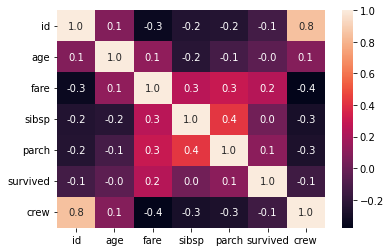

In [109]:
import seaborn as sns

sns.heatmap(titanic_df.corr(), annot=True, fmt='.1f')

In [110]:
def fix_class(row):
    if row['class'] == '1st':
        return 1
    elif row['class'] == '2nd':
        return 2
    elif row['class'] == '3rd':
        return 3
    else:
        return 0

In [111]:
titanic_df['class'] = titanic_df.apply(lambda row: fix_class(row), axis=1)

In [112]:
pd.value_counts(titanic_df['class'])

0    890
3    709
1    324
2    284
Name: class, dtype: int64

<AxesSubplot:>

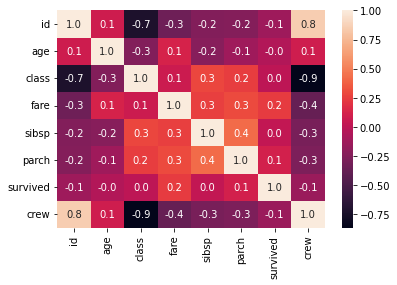

In [113]:
sns.heatmap(titanic_df.corr(), annot=True, fmt='.1f')

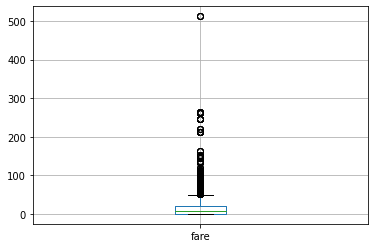

In [114]:
import matplotlib.pyplot as plt

titanic_df.boxplot(column='fare')

plt.show()

In [115]:
titanic_df.loc[titanic_df['fare'] > 500]

,id,gender,age,class,embarked,country,fare,sibsp,parch,survived,crew
197,197,female,58.0,1,Cherbourg,United States,512.0607,0.0,1.0,1,0
198,198,male,36.0,1,Cherbourg,United States,512.0607,0.0,1.0,1,0
714,714,male,35.0,1,Cherbourg,NaN,512.0607,0.0,0.0,1,0
1248,1248,female,37.0,1,Cherbourg,NaN,512.0607,0.0,0.0,1,0


In [126]:
def fare_grouping(row):
    if row['fare'] == 0:
        return 0
    elif row['fare'] < 100:
        return 100
    elif row['fare'] < 200:
        return 200
    elif row['fare'] < 300:
        return 300
    elif row['fare'] < 400:
        return 400
    elif row['fare'] < 500:
        return 500
    elif row['fare'] < 600:
        return 600


In [127]:
titanic_df['fare_group'] = titanic_df.apply(lambda row: fare_grouping(row), axis=1)

In [133]:
df_cat = titanic_df[['survived','class','gender','embarked', 'fare_group', 'crew']]

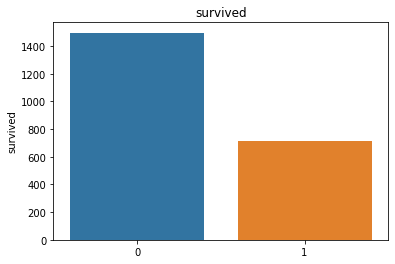

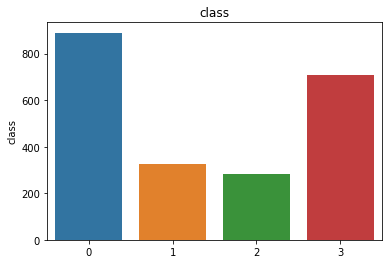

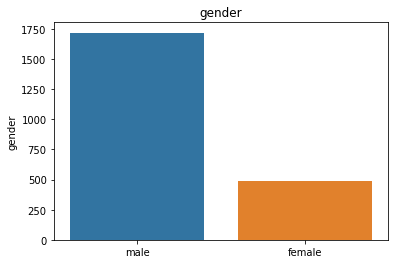

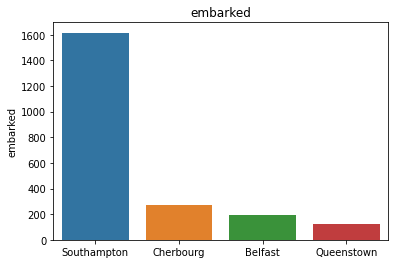

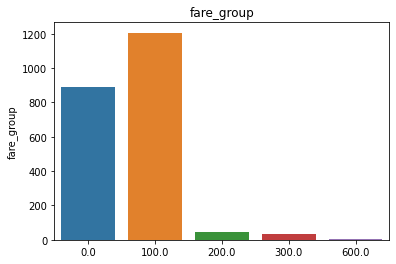

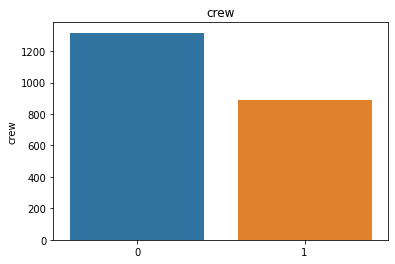

In [134]:
for col in df_cat.columns:
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts()).set_title(col)
    plt.show()

In [130]:
pd.value_counts(titanic_df['fare_group'])

100.0    1206
0.0       890
200.0      47
300.0      34
600.0       4
Name: fare_group, dtype: int64

In [131]:
titanic_df.corr()

,age,class,fare,sibsp,parch,survived,crew,fare_group
age,1.000000,-0.251922,0.117495,-0.232598,-0.125501,-0.047124,0.082294,-0.012445
class,-0.251922,1.000000,0.068444,0.282604,0.245744,0.005540,-0.867170,0.633866
fare,0.117495,0.068444,1.000000,0.250522,0.295272,0.239689,-0.378352,0.779532
sibsp,-0.232598,0.282604,0.250522,1.000000,0.423199,0.022781,-0.291919,0.263395
parch,-0.125501,0.245744,0.295272,0.423199,1.000000,0.104978,-0.272742,0.294812
survived,-0.047124,0.005540,0.239689,0.022781,0.104978,1.000000,-0.149666,0.203542
crew,0.082294,-0.867170,-0.378352,-0.291919,-0.272742,-0.149666,1.000000,-0.839676
fare_group,-0.012445,0.633866,0.779532,0.263395,0.294812,0.203542,-0.839676,1.000000
